In [95]:
import warnings
warnings.filterwarnings('ignore')

from keras.models import Sequential
from keras.layers import Dense
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import matplotlib
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
import re
import requests
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [78]:
df = pd.read_csv('~/Project/Spotify_data/spotify_data.csv')

In [79]:
df.head(5)

,track_name,artist_name,album_name,popularity,market,genres,duration_mins,release_year,tempo,speechiness,loudness,liveness,instrumentalness,energy,acousticness,valence,like
0,Sparks,Coldplay,Parachutes,84,USA,"permanent wave, pop",3.784883,2000,102.617,0.0281,-10.506,0.1040,0.051700,0.268,0.74800,0.165,0
1,The Real Slim Shady,Eminem,The Marshall Mathers LP,86,USA,"detroit hip hop, hip hop, rap",4.736667,2000,104.504,0.0572,-4.244,0.0454,0.000000,0.661,0.03020,0.760,1
2,Yellow,Coldplay,Parachutes,87,USA,"permanent wave, pop",4.446217,2000,173.372,0.0281,-7.227,0.2340,0.000121,0.661,0.00239,0.285,0
3,In the End,Linkin Park,Hybrid Theory (Bonus Edition),85,USA,"alternative metal, nu metal, post-grunge, rap ...",3.614667,2000,105.143,0.0584,-5.870,0.2090,0.000000,0.864,0.00958,0.400,1
4,Kryptonite,3 Doors Down,The Better Life,78,USA,"alternative metal, nu metal, pop rock, post-gr...",4.508433,2000,99.009,0.0286,-5.708,0.1680,0.000011,0.865,0.00664,0.543,0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        10000 non-null  object 
 1   artist_name       10000 non-null  object 
 2   album_name        10000 non-null  object 
 3   popularity        10000 non-null  int64  
 4   market            10000 non-null  object 
 5   genres            10000 non-null  object 
 6   duration_mins     10000 non-null  float64
 7   release_year      10000 non-null  int64  
 8   tempo             9794 non-null   float64
 9   speechiness       9794 non-null   float64
 10  loudness          9794 non-null   float64
 11  liveness          9794 non-null   float64
 12  instrumentalness  9794 non-null   float64
 13  energy            9794 non-null   float64
 14  acousticness      9794 non-null   float64
 15  valence           9794 non-null   float64
 16  like              10000 non-null  int64  

In [81]:
df.describe()

,popularity,duration_mins,release_year,tempo,speechiness,loudness,liveness,instrumentalness,energy,acousticness,valence,like
count,10000.00000,10000.000000,10000.000000,9794.000000,9794.000000,9794.000000,9794.000000,9794.000000,9794.000000,9794.000000,9794.000000,10000.000000
mean,59.93570,3.866828,2009.817600,122.386905,0.092437,-6.675199,0.186211,0.053423,0.669921,0.217499,0.491092,0.309000
std,8.99907,1.189037,5.641286,30.629611,0.096739,3.460022,0.145382,0.182675,0.212296,0.270498,0.244033,0.462104
min,39.00000,0.558217,2000.000000,0.000000,0.000000,-41.766000,0.019300,0.000000,0.000252,0.000001,0.000000,0.000000
25%,53.00000,3.299437,2005.000000,97.012250,0.035100,-7.900500,0.096200,0.000000,0.534000,0.011700,0.296000,0.000000
50%,59.00000,3.793108,2010.000000,120.045500,0.050400,-5.925500,0.125000,0.000003,0.698000,0.091000,0.482000,0.000000
75%,66.00000,4.318925,2015.000000,143.004750,0.103000,-4.493250,0.240000,0.000716,0.841000,0.332000,0.681000,1.000000
max,91.00000,68.670970,2019.000000,220.099000,0.867000,0.522000,0.993000,0.994000,0.997000,0.996000,1.000000,1.000000


## Preprocessing


In [82]:
df = df.drop_duplicates().reset_index(drop = True)

In [83]:
# Define a regex pattern to match Latin characters
regex_pattern = r'^[a-zA-Z\s]+$'

# Use str.match() on the 'Text' column to select rows with Latin characters
df = df[df['track_name'].str.match(regex_pattern)]

In [84]:
# Drop missing values
df.dropna(inplace = True)
df.reset_index(inplace = True)

In [85]:
df.drop(columns =['index'], inplace = True)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9794 entries, 0 to 9793
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        9794 non-null   object 
 1   artist_name       9794 non-null   object 
 2   album_name        9794 non-null   object 
 3   popularity        9794 non-null   int64  
 4   market            9794 non-null   object 
 5   genres            9794 non-null   object 
 6   duration_mins     9794 non-null   float64
 7   release_year      9794 non-null   int64  
 8   tempo             9794 non-null   float64
 9   speechiness       9794 non-null   float64
 10  loudness          9794 non-null   float64
 11  liveness          9794 non-null   float64
 12  instrumentalness  9794 non-null   float64
 13  energy            9794 non-null   float64
 14  acousticness      9794 non-null   float64
 15  valence           9794 non-null   float64
 16  like              9794 non-null   int64  


In [87]:
# a dataframe with having only numerical columns
df_X = df.drop(columns = ['track_name','album_name','market','artist_name','genres'])

In [88]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9794 entries, 0 to 9793
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        9794 non-null   int64  
 1   duration_mins     9794 non-null   float64
 2   release_year      9794 non-null   int64  
 3   tempo             9794 non-null   float64
 4   speechiness       9794 non-null   float64
 5   loudness          9794 non-null   float64
 6   liveness          9794 non-null   float64
 7   instrumentalness  9794 non-null   float64
 8   energy            9794 non-null   float64
 9   acousticness      9794 non-null   float64
 10  valence           9794 non-null   float64
 11  like              9794 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 918.3 KB


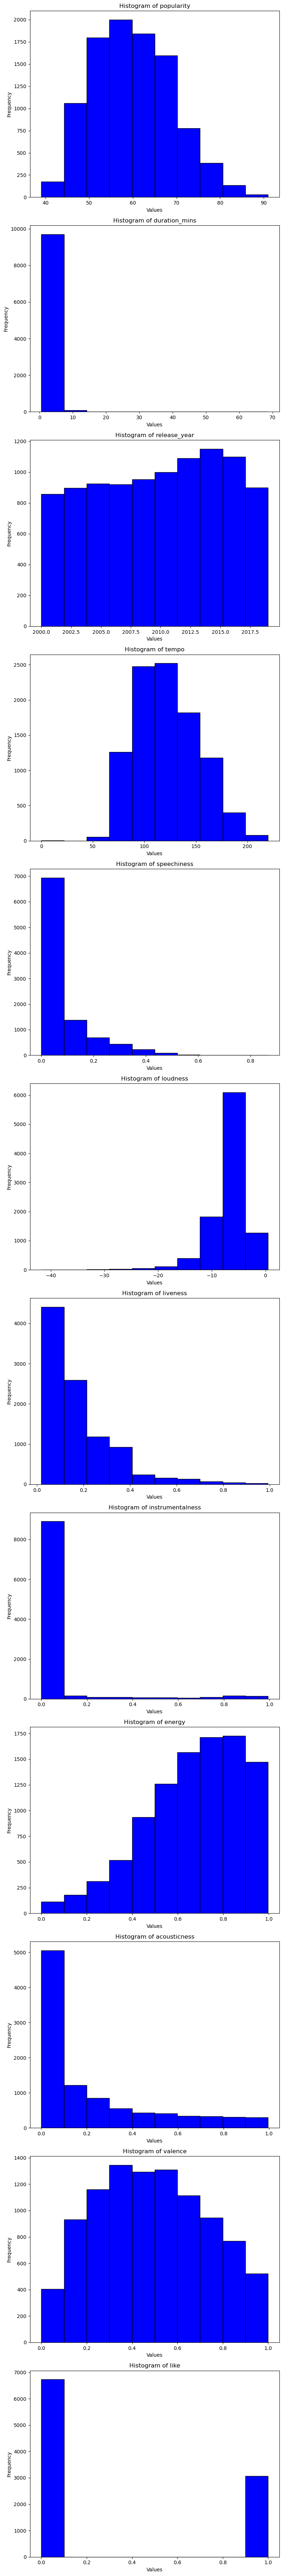

In [93]:
# List of columns to plot histograms
columns_to_plot = df_X.columns

# Set up the figure and axes
fig, axs = plt.subplots(len(columns_to_plot), figsize=(8, 6*len(columns_to_plot)))

# Iterate over the columns and plot histograms
for i, column in enumerate(columns_to_plot):
    # Create a subplot for each column
    ax = axs[i] if len(columns_to_plot) > 1 else axs

    # Plot histogram
    ax.hist(df_X[column], bins=10, color='blue', edgecolor='black')

    # Set plot title and labels
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [96]:
#StandardScaler
scaler = MinMaxScaler().fit(df_X)
df_X_scaled = scaler.transform(df_X)
df_X_scaled =pd.DataFrame(df_X_scaled)
df_X_scaled.columns = df_X.columns

In [97]:
df_X_scaled.head(5)

,popularity,duration_mins,release_year,tempo,speechiness,loudness,liveness,instrumentalness,energy,acousticness,valence,like
0,0.865385,0.047372,0.0,0.466231,0.032411,0.739217,0.086988,0.052012,0.268622,0.751004,0.165,0.0
1,0.903846,0.061346,0.0,0.474805,0.065975,0.887297,0.026805,0.000000,0.662904,0.030320,0.760,1.0
2,0.923077,0.057082,0.0,0.787700,0.032411,0.816757,0.220499,0.000122,0.662904,0.002398,0.285,0.0
3,0.884615,0.044873,0.0,0.477708,0.067359,0.848846,0.194824,0.000000,0.866566,0.009617,0.400,1.0
4,0.750000,0.057995,0.0,0.449838,0.032987,0.852677,0.152716,0.000011,0.867569,0.006665,0.543,0.0


<Axes: >

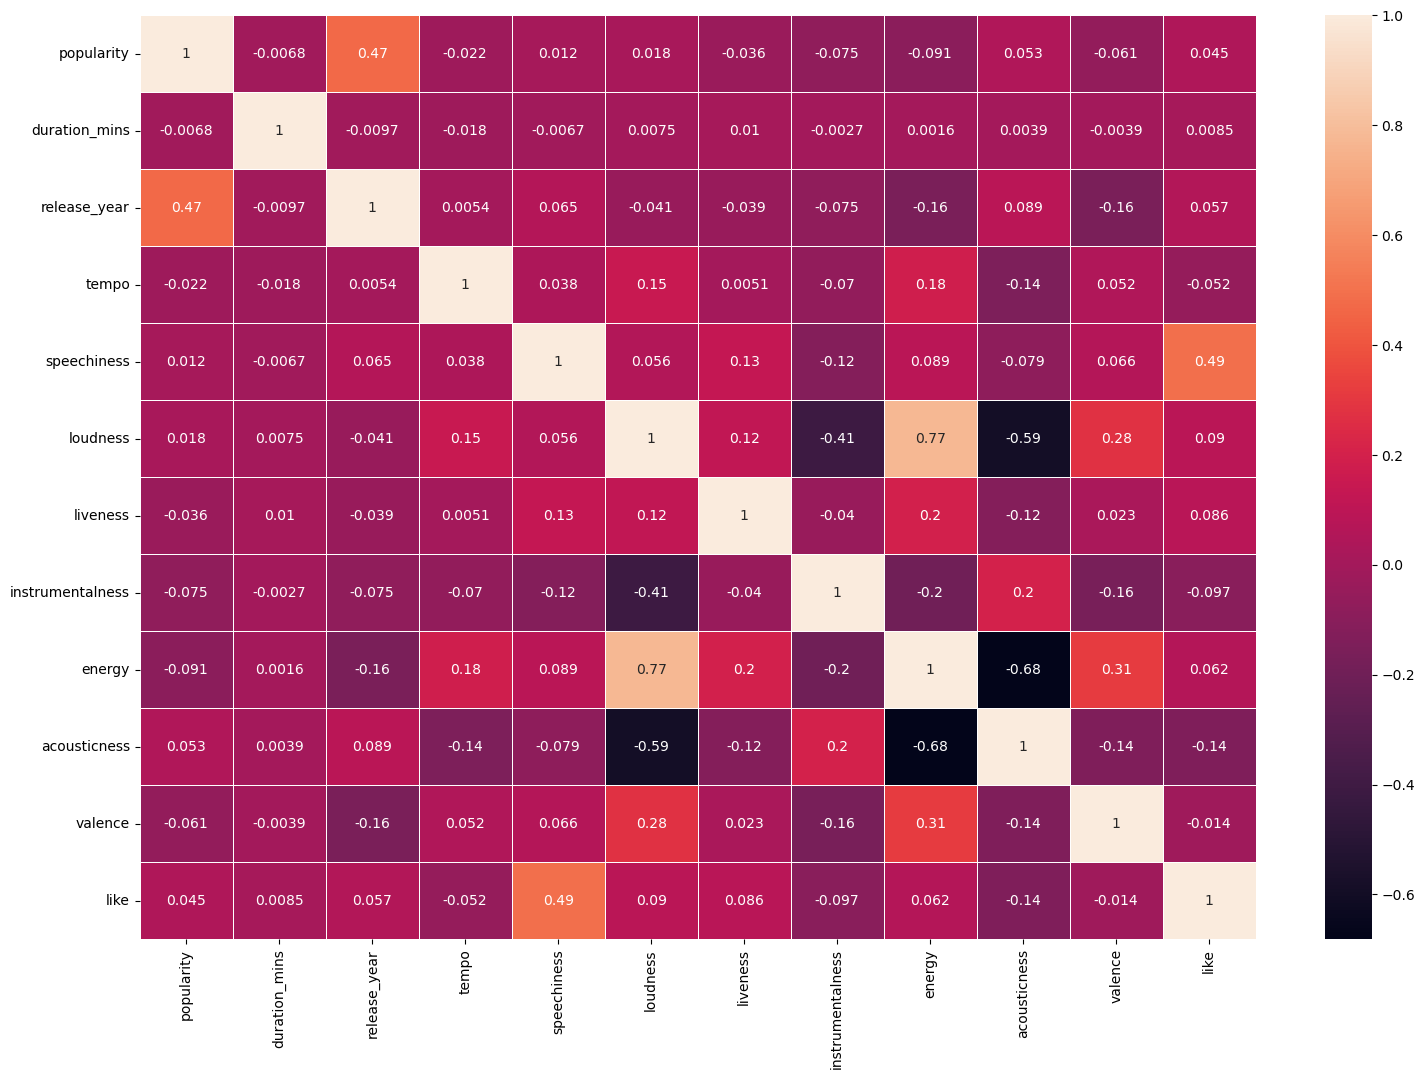

In [98]:
plt.subplots(figsize=(18, 12))
corr = df_X_scaled.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, linewidths=.5,annot=True)

## EDA

<Axes: xlabel='count', ylabel='release_year'>

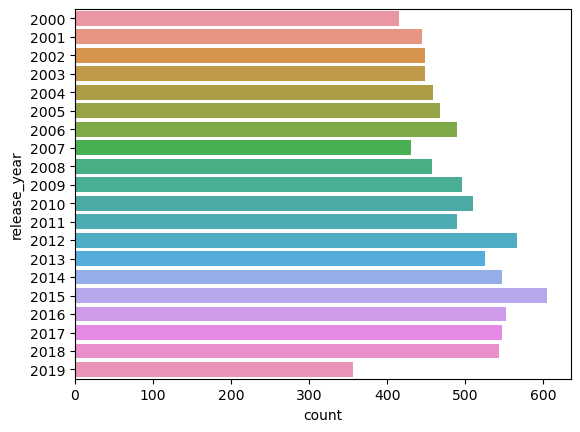

In [103]:
sns.countplot(data = df, y ='release_year')
# số bài hát được ra trong năm

In [104]:
df['artist_name'].nunique()
# số lượng nghệ sĩ trong bộ dữ liệu

1607

In [105]:
import statistics

duration_mean = statistics.mean(df['duration_mins'])
duration_mean
# Một bài nhạc trung bình dài khoảng 3.8 phút

3.864904450275679

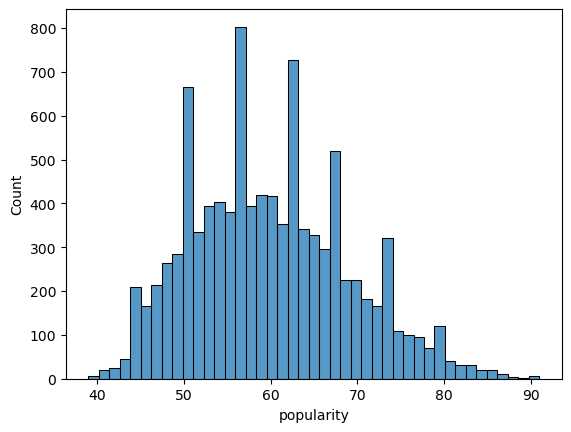

In [106]:
sns.histplot(data=df, x='popularity')
plt.show()

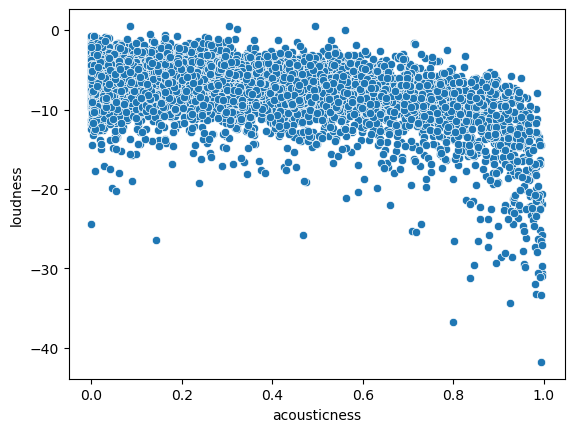

In [107]:
# Tương quan giữa acoustic và độ lớn
sns.scatterplot(data=df, x='acousticness', y='loudness')
plt.show()

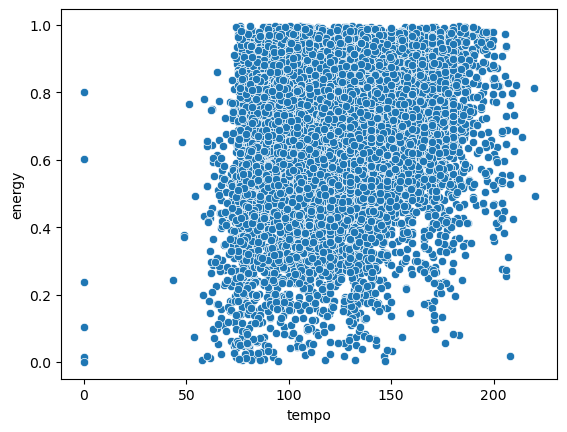

In [108]:
# tương quan giữa tempo và năng lượng của bài nhạc
sns.scatterplot(data=df, x='tempo', y='energy')
plt.show()

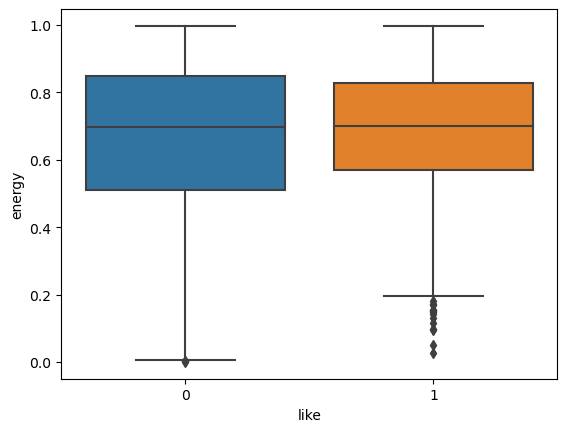

In [109]:
# Tương quan giữa 'like' và 'energy'
sns.boxplot(data=df, x='like', y='energy')
plt.show()

### Assuming there are users with random songs so we need to make a simple songs recommender system


In [100]:
 ## Assuming that there are users with random songs

 #indices = np.arange(df_X_scaled.shape[0])
 #random_indices = np.random.choice(indices, size=20, replace=False)

 # RANDOM SONGS FOR User
 #user_X = df_X_scaled.loc[random_indices]
 #print(user_X)

      popularity  duration_mins  release_year     tempo  speechiness  \
4680    0.653846       0.036100      0.526316  0.774156     0.042791   
3476    0.423077       0.037252      0.368421  0.427131     0.292964   
7076    0.288462       0.050717      0.736842  0.690062     0.246828   
8177    0.442308       0.048986      0.842105  0.663447     0.100231   
9105    0.538462       0.047809      0.947368  0.715396     0.083622   
52      0.403846       0.056116      0.000000  0.650412     0.052710   
1869    0.326923       0.033321      0.210526  0.583983     0.034256   
3802    0.269231       0.040492      0.421053  0.666964     0.045790   
4826    0.538462       0.084582      0.526316  0.940572     0.053057   
605     0.346154       0.028998      0.052632  0.540529     0.052941   
497     0.480769       0.054609      0.052632  0.411751     0.056517   
1244    0.134615       0.130502      0.105263  0.718899     0.055363   
9609    0.634615       0.033320      1.000000  0.395481     0.04

In [102]:
 #Xem các bài nhạc đã được chọn
 #df.loc[random_indices,['track_name','artist_name','genres']]

,track_name,artist_name,genres
4680,Mientes,Camila,"latin arena pop, latin pop"
3476,Perros,Cartel De Santa,"latin hip hop, mexican hip hop"
7076,Till The End,Logic,"conscious hip hop, dmv rap, hip hop, pop rap, rap"
8177,Black Barbies,Nicki Minaj,"dance pop, hip pop, pop, queens hip hop, rap"
9105,Honey,Vacations,newcastle nsw indie
52,Rx Queen,Deftones,"alternative metal, nu metal, rap metal, rock, ..."
1869,Whiskey,Trampled by Turtles,"bluegrass, deep new americana, duluth indie, i..."
3802,Between Jennings And Jones,Jamey Johnson,"country, country road, outlaw country, redneck"
4826,Compartir,Carla Morrison,mexican pop
605,Shimmy,System Of A Down,"alternative metal, nu metal, rap metal"


In [110]:
user_y = [9,1,2,1,9.5,3.2,8.5,2,3,1,2,8.5,2,9,10,3,9,5,8,2] # Diem danh gia

## Regression

In [120]:
simple_LR_model = LinearRegression().fit(user_X, user_y)
# Sử dụng hồi quy tuyến tính

In [121]:
# Xem các trong số của mô hình này
weights = zip(user_X.columns.values, simple_LR_model.coef_)
for weight in weights:
    print(weight)

('popularity', 5.262105245555492)
('duration_mins', 131.12763725807957)
('release_year', -4.750917589176879)
('tempo', -7.13098910724667)
('speechiness', 19.22319270454212)
('loudness', 76.5026595808136)
('liveness', -10.68239621259173)
('instrumentalness', 30.535090340818677)
('energy', -28.25672592392285)
('acousticness', -17.458518141528465)
('valence', -5.109500863871791)
('like', -6.757090967827395)


In [122]:
df_X_scaled = df_X_scaled.dropna(axis=0)
df_X_scaled.shape
# loại bỏ các cột NA được tạo ra trong quá trình chuẩn hóa nếu có

(9794, 12)

In [123]:
pred_linear = simple_LR_model.predict(df_X_scaled)

In [124]:
lr_df = df_X_scaled.copy()
lr_df['predict rating'] = pred_linear

In [125]:
# chọn ra top 5 bài được đánh giá điểm cao nhất theo mô hình hồi quy tuyến tính
lr_df_sorted = lr_df.sort_values(by=['predict rating'])
top_10_lr = lr_df_sorted[lr_df_sorted.shape[0] - 10:]
top_10_lr

,popularity,duration_mins,release_year,tempo,speechiness,loudness,liveness,instrumentalness,energy,acousticness,valence,like,predict rating
8315,0.500000,0.086477,0.842105,0.572892,0.110727,0.925369,0.431036,0.920523,0.947830,0.005631,0.326,0.0,38.120637
2899,0.346154,0.072461,0.315789,0.537890,0.033795,0.785708,0.102393,0.845070,0.569600,0.004437,0.248,0.0,38.373628
474,0.384615,0.047301,0.052632,0.374936,0.066667,0.839009,0.071480,0.867203,0.667920,0.000456,0.666,0.0,38.560186
1585,0.269231,0.045206,0.157895,0.618026,0.038639,0.899570,0.212283,0.860161,0.661901,0.000835,0.533,0.0,38.662962
7198,0.807692,0.057072,0.789474,0.373841,0.038062,0.867220,0.070145,0.913481,0.759217,0.081023,0.433,0.0,38.814784
5625,0.480769,0.063043,0.631579,0.772711,0.033333,0.852630,0.110609,0.872233,0.612741,0.000183,0.272,0.0,39.257245
8364,0.730769,0.078145,0.894737,0.342128,0.033449,0.765820,0.080312,0.802817,0.478303,0.054417,0.141,0.0,39.459676
5543,0.326923,0.059375,0.578947,0.459034,0.074971,0.858849,0.181473,0.796781,0.550538,0.002690,0.197,0.0,40.766022
504,0.403846,0.065587,0.052632,0.654251,0.041176,0.756976,0.090069,0.932596,0.416101,0.008523,0.189,0.0,43.511894
7359,0.461538,1.000000,0.789474,0.393991,0.236448,0.735883,0.169149,0.000000,0.458238,0.493975,0.596,1.0,119.013825


In [126]:
indices = [index for index in top_10_lr.index]
df.loc[indices,['track_name','artist_name','genres']]
# User ở trên chấm diểm cao cho những bài nhạc thuộc thể loại hip hop, rap --> kết quả gợi ý trong 10 bài xuất hiện 4 bài thuộc cùng thể loại

,track_name,artist_name,genres
8315,Astronomia,Vicetone,"edm, electro house, gaming edm, pop dance, pop..."
2899,Right In Two,TOOL,"alternative metal, alternative rock, art rock,..."
474,Hard To Explain,The Strokes,"alternative rock, garage rock, modern rock, pe..."
1585,The End Has No End,The Strokes,"alternative rock, garage rock, modern rock, pe..."
7198,Alien Blues,Vundabar,"boston indie, indie garage rock, indie pop"
5625,Advice,Alex G,"indie pop, philly indie"
8364,Sunsetz,Cigarettes After Sex,"ambient pop, dream pop, el paso indie, shoegaze"
5543,Opr,Gesaffelstein,"dark clubbing, destroy techno"
504,Drown,The Smashing Pumpkins,"alternative metal, alternative rock, grunge, p..."
7359,Institution,Kodak Black,"florida drill, florida rap, hip hop, melodic r..."


In [143]:
#Neural Network
model = Sequential([
    Dense(200, input_shape=(12,), activation='relu'), 
    Dense(150, activation='relu'), 
    Dense(100, activation='relu'), 
    Dense(1, activation='relu') 
])

In [144]:
model.compile(loss='mean_absolute_error', optimizer='adam')

In [145]:
user_y_arr = np.array(user_y)

In [146]:
model.fit(user_X, user_y_arr, epochs=50, batch_size=32, validation_split = .2) 

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 4.6687 - val_loss: 6.0000
Epoch 2/50
1/1 [==============================] - 0s 49ms/step - loss: 4.6687 - val_loss: 6.0000
Epoch 3/50
1/1 [==============================] - 0s 52ms/step - loss: 4.6687 - val_loss: 6.0000
Epoch 4/50
1/1 [==============================] - 0s 46ms/step - loss: 4.6687 - val_loss: 6.0000
Epoch 5/50
1/1 [==============================] - 0s 53ms/step - loss: 4.6687 - val_loss: 6.0000
Epoch 6/50
1/1 [==============================] - 0s 48ms/step - loss: 4.6687 - val_loss: 6.0000
Epoch 7/50
1/1 [==============================] - 0s 54ms/step - loss: 4.6687 - val_loss: 6.0000
Epoch 8/50
1/1 [==============================] - 0s 47ms/step - loss: 4.6687 - val_loss: 6.0000
Epoch 9/50
1/1 [==============================] - 0s 49ms/step - loss: 4.6687 - val_loss: 6.0000
Epoch 10/50
1/1 [==============================] - 0s 50ms/step - loss: 4.6687 - val_loss: 6.0000
Epoch 11/50
1/1 [==============

In [147]:
preds_nn = model.predict(df_X_scaled)

307/307 [==============================] - 1s 2ms/step


In [148]:
df_nn = df_X_scaled.copy()
df_nn['predict rating'] = preds_nn

df_nn_sorted = df_nn.sort_values(by=['predict rating'])
top_10_nn = df_nn_sorted[df_nn_sorted.shape[0]-10:]
top_10_nn

,popularity,duration_mins,release_year,tempo,speechiness,loudness,liveness,instrumentalness,energy,acousticness,valence,like,predict rating
3260,0.403846,0.063003,0.368421,0.558935,0.134948,0.902289,0.083907,0.000568,0.797341,0.039557,0.588,0.0,0.0
3262,0.365385,0.058158,0.368421,0.531743,0.038408,0.883087,0.161960,0.000000,0.902684,0.044075,0.962,0.0,0.0
3263,0.480769,0.036936,0.368421,0.507281,0.034256,0.759601,0.083907,0.573441,0.500375,0.270079,0.628,0.0,0.0
3264,0.365385,0.074546,0.368421,0.609744,0.091465,0.793298,0.084934,0.000000,0.585653,0.038854,0.680,0.0,0.0
3265,0.423077,0.046769,0.368421,0.581602,0.056978,0.864477,0.090069,0.000000,0.953850,0.004989,0.721,0.0,0.0
3266,0.365385,0.042214,0.368421,0.363895,0.053057,0.870909,0.129095,0.203219,0.910710,0.000100,0.495,1.0,0.0
3267,0.346154,0.040267,0.368421,0.426476,0.100807,0.860433,0.080928,0.000000,0.732129,0.324296,0.732,0.0,0.0
3268,0.500000,0.075026,0.368421,0.404341,0.031949,0.874929,0.218445,0.000033,0.694005,0.086746,0.313,0.0,0.0
3261,0.615385,0.069594,0.368421,0.536195,0.032065,0.845370,0.079799,0.000000,0.605718,0.029316,0.101,1.0,0.0
9793,0.442308,0.048332,1.000000,0.572683,0.063783,0.805004,0.058026,0.000000,0.475294,0.065461,0.443,0.0,0.0


In [137]:
indices = [index for index in top_10_nn.index]
df.loc[indices,['track_name','artist_name','genres']]
# Sử dụng neural network cho ta kết quả tốt hơn khi 7/10 bài gợi ý thuộc thể loại hip hop

,track_name,artist_name,genres
3260,Just Fine,Mary J. Blige,"dance pop, hip pop, neo soul, r&b, urban conte..."
3262,All My Friends Say,Luke Bryan,"contemporary country, country, country road"
3263,House Of Cards,Radiohead,"alternative rock, art rock, melancholia, oxfor..."
3264,Feeling Alright,Rebelution,reggae rock
3265,Since U Been Gone,A Day To Remember,"metalcore, pop punk, screamo"
3266,Ladies And Gentlemen,Saliva,"alternative metal, nu metal, rap metal, rap rock"
3267,Hate That I Love You,Rihanna,"barbadian pop, pop, urban contemporary"
3268,Gotta Go My Own Way,Zac Efron,"dance pop, hollywood, pop, post-teen pop, show..."
3261,Apologize,Timbaland,"dance pop, hip hop, pop, pop rap"
9793,Cringe,Matt Maeson,modern rock


## Phân Lớp

In [ ]:
X_train = df_X_scaled.copy()
y_train = df['like']

In [ ]:
y_train

0       0
1       1
2       0
3       1
4       0
       ..
9789    0
9790    1
9791    0
9792    0
9793    0
Name: like, Length: 9794, dtype: int64

In [ ]:
x_train, x_test, Y_train, Y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
#phân dữ liệu train và test thành 80 -20

### Hồi quy logistic

In [ ]:
# Phân cụm với hồi quy logistic
est_model_lr = LogisticRegressionCV().fit(x_train, Y_train)

print("Logisic Regression R^2 Error on Train Set: {}".format(est_model_lr.score(x_train,Y_train)))
print("CV Error on Train Set: {}".format(`(est_model_lr, x_train, Y_train, cv=10)))
print("CV Error on Test Set: {}".format(cross_val_score(est_model_lr, x_test, Y_test, cv=10)))

Logisic Regression R^2 Error on Train Set: 0.789661774090619
CV Error on Train Set: [0.7869898  0.78316327 0.80739796 0.78826531 0.79081633 0.78671775
 0.80332056 0.78288633 0.79054917 0.7816092 ]
CV Error on Test Set: [0.81122449 0.79591837 0.76530612 0.83673469 0.75       0.84183673
 0.78061224 0.78571429 0.7755102  0.78974359]


In [ ]:
preds_lrr = est_model_lr.predict(X_train)
df_lrr = X_train.copy()
df_lrr['predict like'] = preds_lrr
df_lrr_sorted = df_lrr.sort_values(ascending=False,by=['predict like'])
top_10_lrr = df_lrr_sorted[:10]
indices = [index for index in top_10_lrr.index]
df.loc[indices,['track_name','artist_name','genres']]
# Với phương pháp hồi quy logistic, ta được 5/10 bài gợi ý thuộc dòng nhạc hip hop - rap

,track_name,artist_name,genres
5310,Above The Law,Bad Meets Evil,"detroit hip hop, gangster rap, hip hop, pop ra..."
2632,Ryder Music,50 Cent,"east coast hip hop, gangster rap, hip hop, pop..."
1426,Get Up Offa That Thing,James Brown,"funk, soul"
4428,My Darling,Eminem,"detroit hip hop, hip hop, rap"
2634,Human After All,Daft Punk,"electro, filter house"
1422,The Jump Off,Lil' Kim,"dance pop, east coast hip hop, gangster rap, h..."
8593,Icon,Jaden,"hip hop, pop, rap"
6722,Candy,Plan B,reggaeton
4434,Fade Away,Breaking Benjamin,"alternative metal, nu metal, post-grunge"
7639,The Adams Administration,Original Broadway Cast of Hamilton,"broadway, hollywood, show tunes"


### Random Forrest

In [ ]:
est_model_rf = RandomForestClassifier(50, min_samples_split=5, max_depth=20).fit(x_train, Y_train)

print("Random Forest MSE Error on Train Set: {}".format(est_model_rf.score(x_train,Y_train)))
print("CV Error on Train Set: {}".format(cross_val_score(est_model_rf, x_train, Y_train,cv=10)))
print("CV Error on Test Set: {}".format(cross_val_score(est_model_rf, x_test, Y_test, cv=10)))

Random Forest MSE Error on Train Set: 0.9851946394384173
CV Error on Train Set: [0.83163265 0.81122449 0.82142857 0.80867347 0.83163265 0.79565773
 0.82886335 0.80842912 0.81609195 0.81609195]
CV Error on Test Set: [0.79591837 0.81122449 0.76020408 0.85204082 0.7755102  0.86734694
 0.80102041 0.81632653 0.77040816 0.81025641]


In [ ]:
preds_rf = est_model_rf.predict(X_train)
df_rf = X_train.copy()
df_rf['predict like'] = preds_rf
df_rf_sorted = df_rf.sort_values(ascending=False,by=['predict like'])
top_10_nn = df_rf_sorted[:10]
indices = [index for index in top_10_nn.index]
df.loc[indices,['track_name','artist_name','genres']]
#Với random forest, ta có kết quả khả quan hơn khi 7/10 bài gợi ý thuộc thể loại hiphop

,track_name,artist_name,genres
1930,Back That Azz Up,JUVENILE,"bounce, crunk, dirty south rap, gangster rap, ..."
8369,Location,Playboi Carti,"atl hip hop, hip hop, plugg, pluggnb, rap"
7364,Sexy Drug,Falling In Reverse,"modern rock, rap metal"
2017,Bleeding Mascara,Atreyu,"alternative metal, melodic metalcore, metalcor..."
2018,Why,Jadakiss,"battle rap, east coast hip hop, gangster rap, ..."
3381,Go Girl,Pitbull,"dance pop, miami hip hop, pop, pop rap"
8373,Getaway Car,Taylor Swift,pop
8372,For the Last Time,$uicideboy$,"dark trap, new orleans rap, underground hip hop"
6267,Satellites,Kevin Gates,"baton rouge rap, pop rap, rap, southern hip ho..."
2023,Eye,Madvillain,"abstract hip hop, alternative hip hop, hip hop..."


### Gradient Boosting 

In [ ]:
est_model_gb = GradientBoostingRegressor(n_estimators=501, max_depth=1, learning_rate=1).fit(x_train,Y_train)

print("Boosting R^2 Error on Train Set: {}".format(est_model_gb.score(x_train,Y_train)))
print("CV Error on Train Set: {}".format(cross_val_score(est_model_gb, x_train, Y_train,cv=10)))
print("CV Error on Test Set: {}".format(cross_val_score(est_model_gb, x_test, Y_test, cv=10)))

Boosting R^2 Error on Train Set: 0.40032243299028447
CV Error on Train Set: [0.32890392 0.29015844 0.32704672 0.28245002 0.33177186 0.26743287
 0.36388246 0.31767785 0.34944035 0.27246471]
CV Error on Test Set: [0.23902456 0.1782504  0.22492399 0.27885008 0.15754262 0.31008501
 0.35497236 0.18382892 0.2457656  0.28210128]


In [ ]:
preds_gb = est_model_gb.predict(X_train)
df_gb = X_train.copy()
df_gb['predicted_in_playlist'] = preds_gb
df_gb_sorted = df_gb.sort_values(ascending=False,by=['predicted_in_playlist'])
top_10_nn = df_gb_sorted[:10]
indices = [index for index in top_10_nn.index]
df.loc[indices,['track_name','artist_name','genres']]
# Với Gradient Boosting ta có được gợi ý 10/10 bài đều thuộc thể loại hip hop - rap

,track_name,artist_name,genres
8174,Write Your Name,G Herbo,"chicago drill, chicago rap, drill, rap, southe..."
8600,It Takes Time,Trippie Redd,"melodic rap, rap, trap"
8118,Perkys Calling,Future,"atl hip hop, rap, southern hip hop, trap"
8988,Carrollton,$uicideboy$,"dark trap, new orleans rap, underground hip hop"
5238,Am I A Psycho,Tech N9ne,"hip hop, kansas city hip hop, pop rap"
2618,G Code,Geto Boys,"conscious hip hop, dirty south rap, g funk, ga..."
1353,Gangsta Nation,Westside Connection,"g funk, gangster rap, hardcore hip hop, hip ho..."
1256,Put It On Me,DJ Quik,"g funk, gangster rap, hardcore hip hop, hip ho..."
5332,My Shit Bang,E-40,"cali rap, gangster rap, hip hop, hyphy, oaklan..."
8111,Friend Zone,A Boogie Wit da Hoodie,"melodic rap, rap"
